# Curve Similarity Analysis
- **Created by: Andrés Segura Tinoco**
- **Created on: May 12, 2020**
- **Data: Covid 19**

**Packages Installation**
``` console
conda config --set pip_interop_enabled True
pip install similaritymeasures
```

**Methods:**
1. Mean Absolute Error
2. Partial Curve Mapping
3. Discrete Frechet distance
4. Area between two Curves
5. Curve Length Similarity
6. Dynamic Time Warping distance

## 1. Read C19 data by country

In [1]:
# # Import libraries
import pandas as pd
import numpy as np
import math
import similaritymeasures
from collections import Counter

In [2]:
# Load visualization libraries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [3]:
# Reading data from CSV file
dataURL = "../data/country_data_by_days.csv"
raw_data = pd.read_csv(dataURL)

In [4]:
# Show first 10 rows of header dataframe
raw_data.head(10)

,country,region,1,2,3,4,5,6,7,8,...,120,121,122,123,124,125,126,127,128,129
0,USA,Americas,15,15,15,15,15,15,35,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Spain,Europe,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Italy,Europe,3,3,3,3,3,4,21,79,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,UK,Europe,9,9,9,9,9,9,9,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brazil,Americas,1,1,1,1,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,France,Europe,12,12,12,12,12,12,12,12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Germany,Europe,16,16,16,16,16,16,16,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Turkey,Asia,1,1,1,5,6,18,47,98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Russia,Europe,2,2,2,2,2,2,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Peru,Americas,1,6,7,9,11,17,22,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 2. Calculate the Similarity between Countries

In [5]:
# Control variables
cnt = Counter()
top_country = 10
n_days = 85
n_methods = 6

# Analysis variables
exp_country = 'Colombia'
exp_data = np.zeros((n_days, 2))
countries_data = dict()
countries_region = dict()

In [6]:
# Split data between expected and reality datasets
for ix, row in raw_data.iterrows():
    country_name = row["country"]
    countries_region[country_name] = row["region"]
    y = []
    
    for i in range(1, n_days + 1):
        if pd.notna(row[str(i)]):
            y.append(int(row[str(i)]))
        else:
            break
    
    if country_name == exp_country:    
        exp_data[:, 0] = np.arange(n_days)
        exp_data[:, 1] = y
    else:
        if len(y) == n_days:
            temp_data = np.zeros((n_days, 2))
            temp_data[:, 0] = np.arange(n_days)
            temp_data[:, 1] = y
            countries_data[country_name] = temp_data

### 2.1. Mean Absolute Error

In [7]:
mae_result = dict()
for country, num_data in countries_data.items():
    mae = 0
    for ix in range(0, n_days):
        mae += abs(exp_data[ix, 1] - num_data[ix, 1])
    mae_result[country] = mae / n_days

In [8]:
# Get and save top N
output = sorted(mae_result, key=mae_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, mae_result[country]))

South Africa: 633.964705882353
Indonesia: 831.9764705882353
Ukraine: 1102.6705882352942
Sweden: 1382.894117647059
Romania: 1430.235294117647
Dominican Republic: 1813.4941176470588
Singapore: 1924.2941176470588
Serbia: 2332.0117647058823
Denmark: 2396.2
Poland: 2451.9176470588236


### 2.2. Partial Curve Mapping

In [9]:
# Quantify the difference between the two curves using PCM
pcm_result = dict()
for country, num_data in countries_data.items():
    pcm = similaritymeasures.pcm(exp_data, num_data)
    pcm_result[country] = pcm

In [10]:
# Get and save top N
output = sorted(pcm_result, key=pcm_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, pcm_result[country]))

South Africa: 0.6585607196240899
Indonesia: 1.3707868223970083
Sweden: 1.4002132348835026
Ukraine: 1.9302748797323384
Poland: 2.9243273532270213
Singapore: 3.0471346712125
Romania: 3.743895799569243
Belarus: 4.635076105822658
Ireland: 4.697458365018642
Dominican Republic: 5.018178061993577


### 2.3. Discrete Frechet distance

In [11]:
### Quantify the difference between the two curves using Discrete Frechet distance
df_result = dict()
for country, num_data in countries_data.items():
    df = similaritymeasures.frechet_dist(exp_data, num_data)
    df_result[country] = df

In [12]:
# Get and save top N
output = sorted(df_result, key=df_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, df_result[country]))

Sweden: 555.0
South Africa: 602.0
Ireland: 784.0
Indonesia: 2616.0
Poland: 2893.0
Singapore: 2906.0
Ukraine: 3782.0
Switzerland: 5252.0
Portugal: 5422.0
UAE: 7949.0


### 2.4. Area between two Curves

In [13]:
# Quantify the difference between the two curves using Area between two Curves
area_result = dict()
for country, num_data in countries_data.items():
    area = similaritymeasures.area_between_two_curves(exp_data, num_data)
    area_result[country] = area

In [14]:
# Get and save top N
output = sorted(area_result, key=area_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, area_result[country]))

South Africa: 53601.5
Indonesia: 69399.5
Ukraine: 91835.0
Sweden: 117267.5
Romania: 117577.5
Dominican Republic: 148863.5
Singapore: 162076.5
Serbia: 191214.5
Denmark: 196585.0
Poland: 206966.5


### 2.5. Curve Length Similarity

In [15]:
# Quantify the difference between the two curves using Curve Length based similarity measure
cl_result = dict()
for country, num_data in countries_data.items():
    cl = similaritymeasures.curve_length_measure(exp_data, num_data)
    cl_result[country] = cl

In [16]:
# Get and save top N
output = sorted(cl_result, key=cl_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, cl_result[country]))

South Africa: 0.5893686665574823
Sweden: 0.977327116756064
Indonesia: 1.2219708005354801
Ukraine: 1.6280681124977123
Poland: 2.0594224494515436
Singapore: 2.5250514191351145
Romania: 2.8505377269478336
Israel: 2.897651628610236
Ireland: 2.9954047075678223
Belarus: 3.246377408701739


### 2.6. Dynamic Time Warping distance

In [17]:
# Quantify the difference between the two curves using Dynamic Time Warping distance
dtw_result = dict()
for country, num_data in countries_data.items():
    dtw, d = similaritymeasures.dtw(exp_data, num_data)
    dtw_result[country] = dtw

In [18]:
# Get and save top N
output = sorted(dtw_result, key=dtw_result.get, reverse=False)[:top_country]
for country in output:
    cnt[country] += 1
    print('%s: %s' % (country, dtw_result[country]))

South Africa: 9648.749690657904
Sweden: 10711.29693446574
Indonesia: 13029.951753672256
Ireland: 15884.87067342326
Poland: 17007.13676767388
Singapore: 17832.52529391316
Ukraine: 19226.062393640168
UAE: 48093.02849334642
Romania: 49287.641675496765
Belarus: 58169.36897530895


## 3. Plot Similarity Results

In [19]:
cnt.most_common()

[('South Africa', 6),
 ('Indonesia', 6),
 ('Ukraine', 6),
 ('Sweden', 6),
 ('Singapore', 6),
 ('Poland', 6),
 ('Romania', 5),
 ('Ireland', 4),
 ('Dominican Republic', 3),
 ('Belarus', 3),
 ('Serbia', 2),
 ('Denmark', 2),
 ('UAE', 2),
 ('Switzerland', 1),
 ('Portugal', 1),
 ('Israel', 1)]

In [20]:
# Palette of colores
palette = {"Africa": "#FF7F0E", "Americas": "#D62728", "Asia": "#2CA02C", "Europe": "#1F77B4", "Oceania": "#9467BD"}
bars = []
values= []

for row in cnt.most_common():
    bars.append(row[0])
    values.append(row[1])

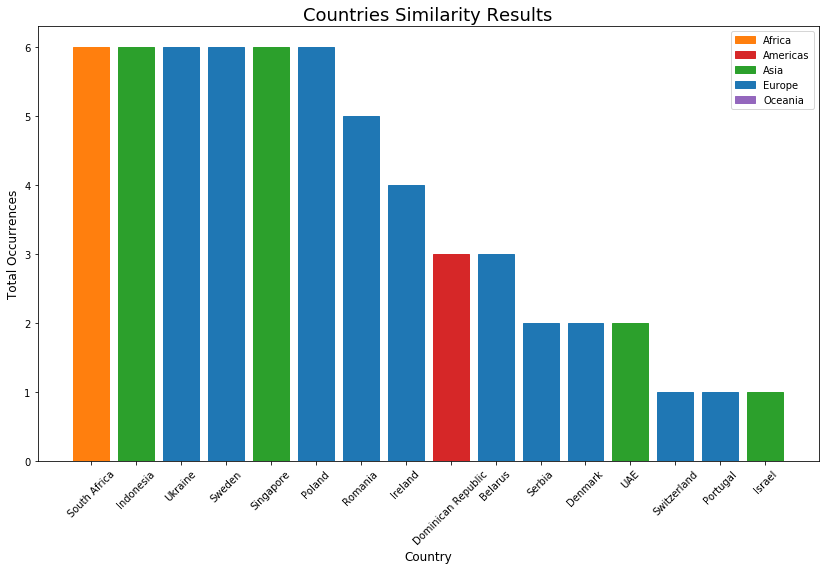

In [21]:
# Plot similarity results
plt.figure(figsize = (14, 8))

barlist = plt.bar(bars, values)
for i, v in enumerate(bars):
    barlist[i].set_color(palette[countries_region[v]])

# Add custom legend
legend_list = []
for k, v in palette.items():
    legend_list.append(mpatches.Patch(color = v, label = k))

# Plot setup
plt.xticks(rotation=45)
plt.title("Countries Similarity Results", fontsize = 18)
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Total Occurrences", fontsize = 12)
plt.legend(handles = legend_list, loc = "best")
plt.show()

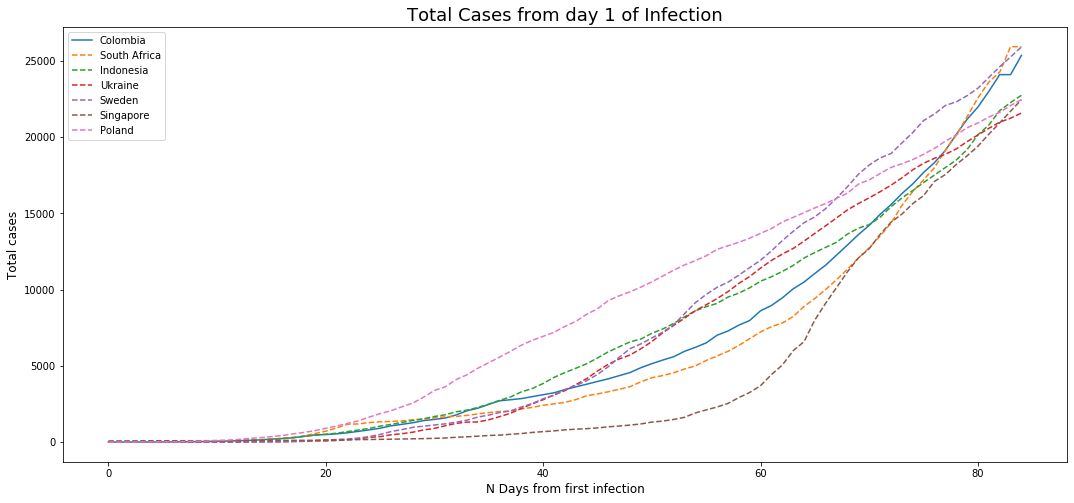

In [22]:
# Plot trends more similar to Colombia
country_list = ['Colombia']

plt.figure(figsize = (18, 8))
plt.plot(exp_data[:, 0], exp_data[:, 1])

for country in cnt:
    if cnt[country] == n_methods:
        country_list.append(country)
        num_data = countries_data[country]
        plt.plot(num_data[:, 0], num_data[:, 1], linestyle='--')

# Plot setup
plt.title("Total Cases from day 1 of Infection", fontsize = 18)
plt.xlabel("N Days from first infection", fontsize = 12)
plt.ylabel("Total cases", fontsize = 12)
plt.legend(country_list, loc = "best")
plt.show()

## References

Jekel, C. F., Venter, G., Venter, M. P., Stander, N., & Haftka, R. T. (2018). Similarity measures for identifying material parameters from hysteresis loops using inverse analysis. International Journal of Material Forming. https://doi.org/10.1007/s12289-018-1421-8

<hr>
<p><a href="https://github.com/ansegura7/WebScraping_Covid19">« Home</a></p>